# IntroStat Week 4 

Welcome to the 4th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 4.


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Simulation: Distribution of the sample mean

In [106]:
# Plot histogram of 10 random values (normally distributed)

# 'True' values in theoretical population
mu = 178
sigma = 12

# size of sample
n = 10

In [107]:
# Draw 10 random numbers
x = stats.norm.rvs(mu, sigma, size=n)
print(x)

[180.73138515 168.75715052 175.99444844 169.90764524 163.53737264
 196.47793848 160.7261311  190.91340526 196.71512198 169.68598845]


179.08804725335884


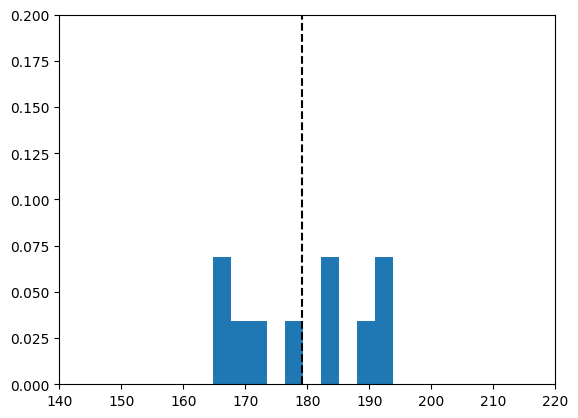

In [108]:
# calculate sample mean and plot
x = stats.norm.rvs(mu, sigma, size=n)
print(x.mean())

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(140,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black")
plt.show()

In [109]:
# Repeat 100 times and plot histogram of the mean values

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
xbar = mat.mean(axis=0)

print(xbar)

[173.85581785 178.85375747 183.53245237 172.21368282 182.94441809
 182.90463353 177.42709101 170.08980932 172.43047936 177.09631324
 173.4225958  180.85155415 183.05325216 176.86362154 173.43697527
 180.22411913 182.02788731 180.99996767 180.30339842 181.42525722
 175.12982301 183.97408141 178.66822767 180.9381601  179.09786212
 180.29513772 176.20352658 186.24327106 182.87915657 170.80852407
 177.11779412 175.45072253 177.26594494 179.67015918 178.96907857
 179.3511099  173.55834101 176.11638171 174.15991454 176.80076866
 181.81149706 174.07197412 181.93080085 172.7829334  175.37021513
 174.97687355 182.5955381  180.9092784  178.01459223 183.08545607
 175.32084665 178.63091107 181.22464019 181.82965528 174.52701088
 174.95175701 181.07809733 178.94996421 178.6491596  177.35030435
 180.00484782 180.60579862 172.30600109 174.67529389 179.5488106
 178.36968533 179.57634634 180.14839682 178.13654719 182.3625652
 179.39223489 175.22591135 175.17765224 174.44027079 181.01097042
 173.8957059

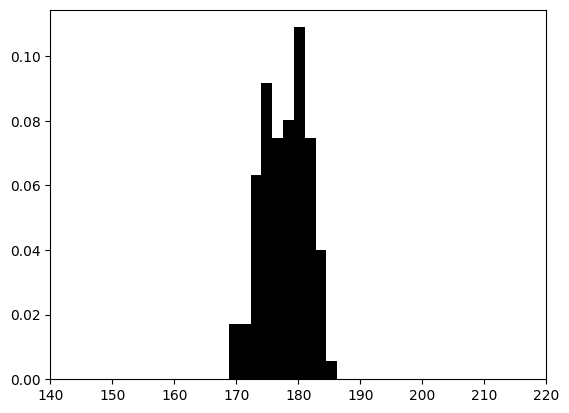

In [110]:
# Plot histogram of the mean values
plt.hist(xbar, density=True, color="black")
plt.xlim(140,220)
plt.show()


### t-distribution

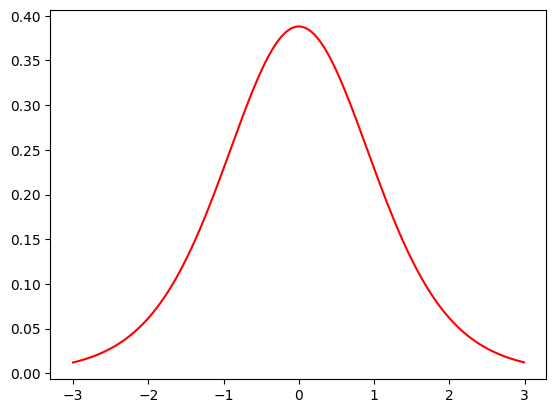

In [111]:
# Plot the t-distribution
plt.plot(np.arange(-3,3,.01), stats.t.pdf(np.arange(-3,3,.01), df=9), color="red")
plt.show()

### Example: find correct quantile in t(9)-distribution

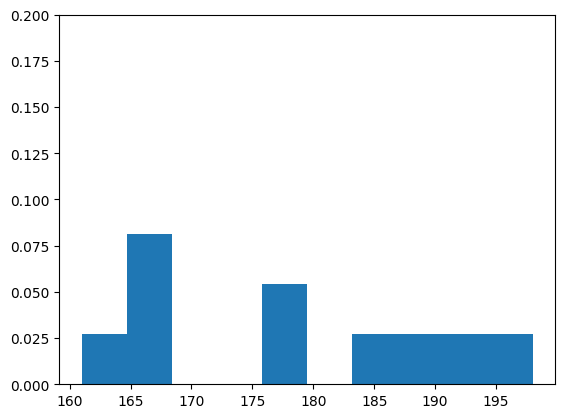

In [80]:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)
plt.ylim(0,.2)
plt.show()

In [82]:
# calculate mean (xbar) and sample standard deviation (S)
xbar = height_data.mean()
s = height_data.std(ddof=1)
print(xbar)
print(s)

178.0
12.211106056009468


In [83]:
t_lower = stats.t.ppf(.025,df=9)
print(t_lower)

-2.262157162740992


In [84]:
t_upper = stats.t.ppf(.975,df=9)
print(t_upper)

2.2621571627409915


In [85]:
mu_lower = xbar + t_lower*s/np.sqrt(10)
mu_upper = xbar + t_upper*s/np.sqrt(10)
print([mu_lower, mu_upper])

[169.26470095351434, 186.73529904648564]


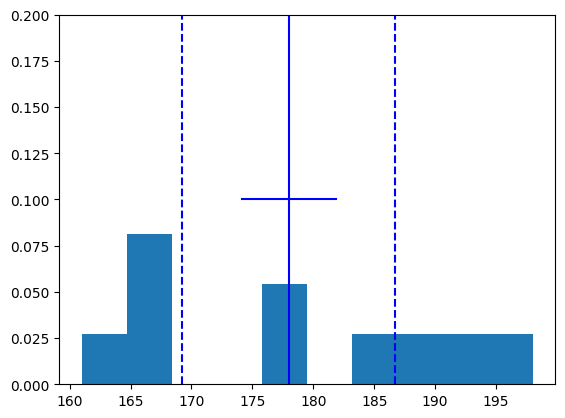

In [86]:
# visualise the confidence interval
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)
plt.axvline(xbar, linestyle='-', color="blue", ymin=0, ymax=1)
plt.plot([xbar-s/np.sqrt(10), xbar+s/np.sqrt(10)], [0.1,0.1], linestyle='-', color="blue")
plt.axvline(mu_lower, linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(mu_upper, linestyle='--', color="blue", ymin=0, ymax=1)
plt.ylim(0,.2)
plt.show()

We can also calcualte a 99%-confidence interval for our mean student height

Will it be wider or narrower ?

Try to calculate the 99% interval using Python

### Simulation: Distribution of the sample variance

151.4176930076104
144


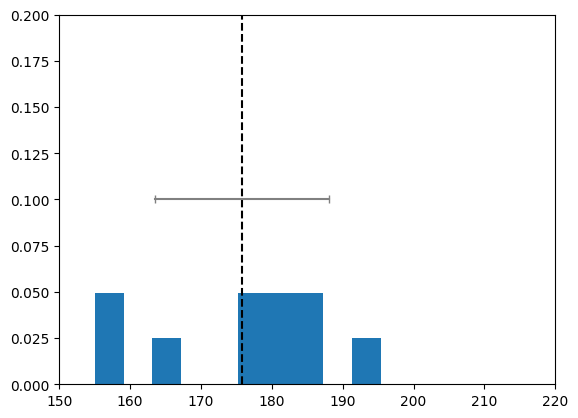

In [115]:
# Back to simulation of student heights
mu = 178
sigma = 12
n = 10

# calculate sample VARIANCE
x = stats.norm.rvs(mu, sigma, size=n)
print(x.var())
print(sigma**2)

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(150,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black")
plt.plot([x.mean()-x.std(),x.mean()+x.std()], [.1, .1], '|', linestyle="-", color='grey')
plt.show()

Not only sample mean changes for each simulation - also the sample variance changes.

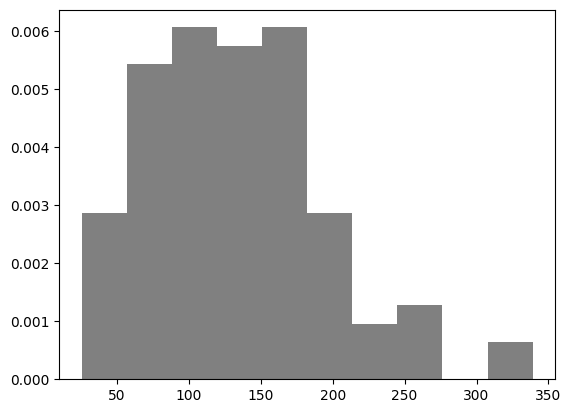

In [117]:
# Repeat 100 times and plot histogram of the variance values

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
s2 = mat.var(axis=0)

plt.hist(s2, density=True, color="grey")
plt.show()

The variance is always positive and does not follow a normal distribution. <br>
The distribution of variance is not symmestric. 

### Example: Variance of student heights 

In [119]:
# A random sample of n = 10 student height have the following sample mean and variance:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xbar = height_data.mean()
s = height_data.std(ddof=1)
n=10

var_hat = s**2
print(var_hat)

149.11111111111111


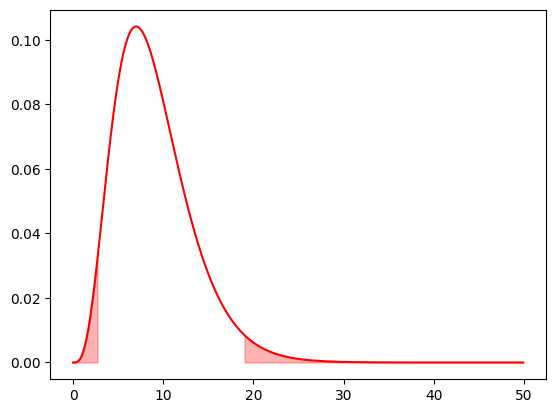

In [103]:
# plot chi-square distribution with n-1 = 9 degrees of freedom
plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
plt.show()

In [120]:
chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

print([chi2_lower, chi2_upper])

[2.7003894999803584, 19.02276779864163]


In [121]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_lower)
print((n-1)*var_hat/chi2_upper)

149.11111111111111
496.96534518807795
70.5470420606106


In [122]:
# confidence interval for the standard deviation
print(np.sqrt(var_hat))
print(np.sqrt((n-1)*var_hat/chi2_lower))
print(np.sqrt((n-1)*var_hat/chi2_upper))

12.211106056009468
22.29271955567732
8.399228658669236


Notice the interval is not symmetric

### CLT in action

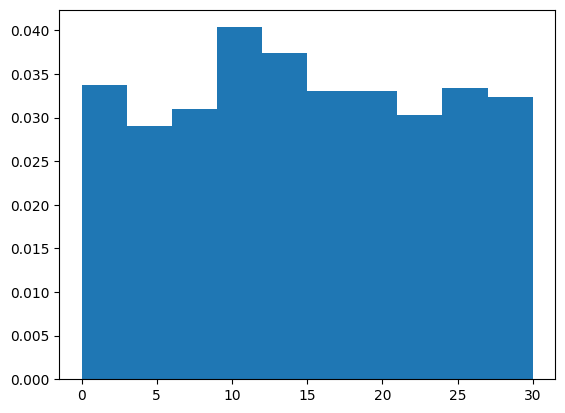

In [130]:
n=1
k=1000
u = stats.uniform.rvs(loc=0, scale=30, size=(n,k))

mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

We can also try with another distribution

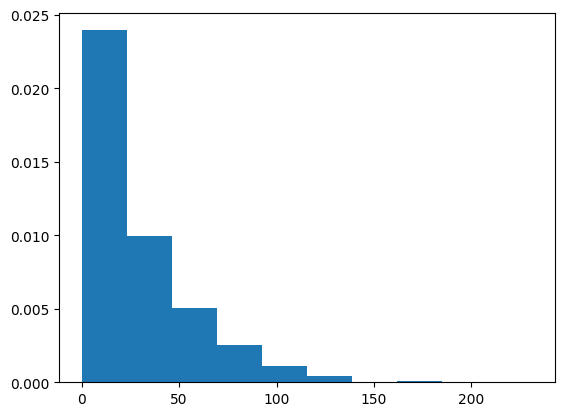

In [158]:
n=1
k=1000
u = stats.expon.rvs(loc=0, scale=30, size=(n,k))
mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

### Example: Exam question from 2016 

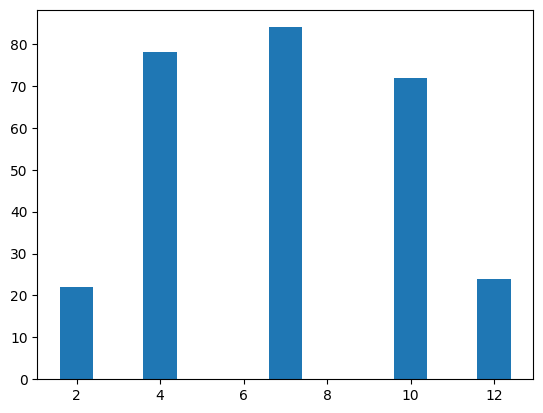

In [159]:
grades = [2,4,7,10,12]
count = [22,78,84,72,24]
plt.bar(grades,count)
plt.show()

In [196]:
# calculate average (mean) grade:
avg_grade = np.sum(np.array(grades)*np.array(count)/280)
print(avg_grade)

6.9714285714285715


In [197]:
grades-avg_grade

array([-4.97142857, -2.97142857,  0.02857143,  3.02857143,  5.02857143])

In [198]:
# calculate variance of grades:
var_grade = 1/(280-1)*np.sum(np.array(count) * (grades-avg_grade)**2)
print(var_grade)

8.959754224270354


In [199]:
avg_grade_standard_error = np.sqrt(var_grade)/np.sqrt(280)
print(avg_grade_standard_error)

0.17888298474012831


In [200]:
t_upper = stats.t.ppf(0.975, df=280-1)
print(t_upper)

1.968503126548004


In [201]:
print(avg_grade - t_upper*avg_grade_standard_error)
print(avg_grade + t_upper*avg_grade_standard_error)

6.61929685668139
7.323560286175753


### Example: Production of tablets 

In [203]:
# A random sample of n = 20 have the following sample mean and variance:

n = 20
mu_hat = 1.01
var_hat = 0.07**2

print(var_hat)

0.004900000000000001


We need to give a confidence interval on the estimate of var_hat

We choose a 95% confidence interval

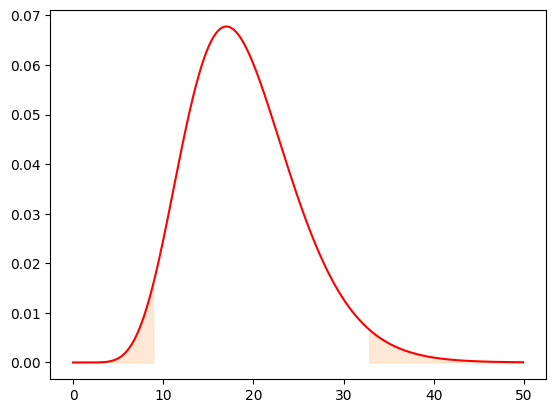

In [204]:
# plot chi-square distribution and visualise the limits of chi^2

# we need the distribution of n-1 = 19 degrees of freedom

plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
plt.show()

In [205]:
chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

print([chi2_lower,chi2_upper])

[8.906516481987971, 32.85232686172969]


In [206]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_lower)
print((n-1)*var_hat/chi2_upper)

0.004900000000000001
0.010453020570756269
0.002833893635353239


In [207]:
# confidence interval for the standard deviation
print(np.sqrt(var_hat))
print(np.sqrt((n-1)*var_hat/chi2_lower))
print(np.sqrt((n-1)*var_hat/chi2_upper))

0.07
0.10224001452834536
0.053234327603091214
